In [24]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [25]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [26]:
x_train.shape

(60000, 28, 28)

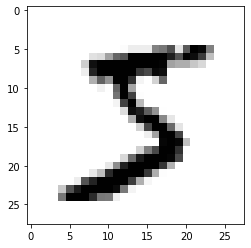

Train label: 5


In [27]:
# Let's look at a single observation
digit = x_train[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print("Train label:", y_train[0])

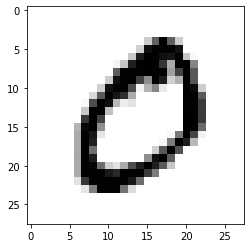

Train label: 0


In [28]:
# Let's look at a single observation
digit = x_train[1]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print("Train label:", y_train[1])

In [29]:
# Model parameters
num_classes = 10

# Tensor of each image
# 28 pixels by 28 pixels
# 1 color channel, 0-255 grayscale
input_shape = (28, 28, 1)

In [30]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [31]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [32]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [33]:
# Build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [34]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 10s 24ms/step - loss: 0.3778 - accuracy: 0.8848 - val_loss: 0.0849 - val_accuracy: 0.9762
Epoch 2/15
422/422 [==============================] - 10s 24ms/step - loss: 0.1123 - accuracy: 0.9657 - val_loss: 0.0618 - val_accuracy: 0.9817
Epoch 3/15
422/422 [==============================] - 10s 24ms/step - loss: 0.0858 - accuracy: 0.9732 - val_loss: 0.0459 - val_accuracy: 0.9883
Epoch 4/15
422/422 [==============================] - 11s 26ms/step - loss: 0.0707 - accuracy: 0.9779 - val_loss: 0.0418 - val_accuracy: 0.9887
Epoch 5/15
422/422 [==============================] - 11s 26ms/step - loss: 0.0637 - accuracy: 0.9798 - val_loss: 0.0404 - val_accuracy: 0.9892
Epoch 6/15
422/422 [==============================] - 10s 25ms/step - loss: 0.0573 - accuracy: 0.9818 - val_loss: 0.0365 - val_accuracy: 0.9907
Epoch 7/15
422/422 [==============================] - 10s 24ms/step - loss: 0.0517 - accuracy: 0.9839 - val_loss: 0.0332 - val_accuracy:

In [21]:
# Evaluate the model on training data
loss, accuracy = model.evaluate(x_train, y_train, verbose=0)
print("Train loss:", loss)
print("Test accuracy:", accuracy)

Train loss: 2.3012008666992188
Test accuracy: 0.11236666887998581


In [22]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Test loss: 2.3010787963867188
Test accuracy: 0.11349999904632568
